In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import rubin_sim.maf.db as db
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.metricBundles as metricBundles
import healpy as hp
from rubin_sim.utils import haversine

In [2]:
dbFile = 'baseline_nexp2_v1.7_10yrs.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabaseFBS(dbFile, defaultTable='SummaryAllProps')
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Querying database SummaryAllProps with constraint filter="r" and note="DD:ELAISS1" for columns ['fieldDec', 'night', 'fieldRA']
Found 4448 visits
Running:  ['opsim_Count_night_r_and_noteDD_ELAISS1_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r" and note="DD:ELAISS1"" constraint now.


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: -6.18485e+06  dipole: lon: 9.4671, lat: -43.9858, amp: 6.18994e+06
  warnings.warn(


Plotting complete.


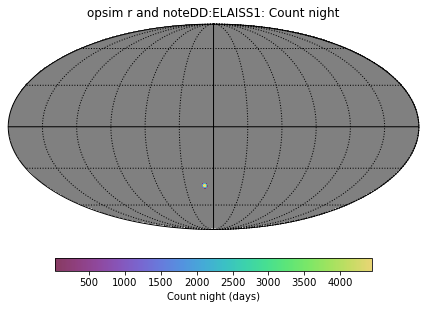

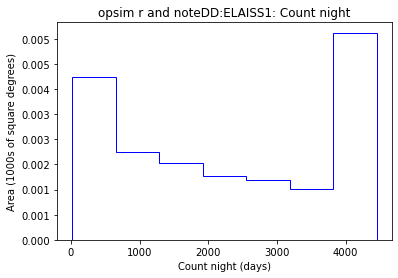

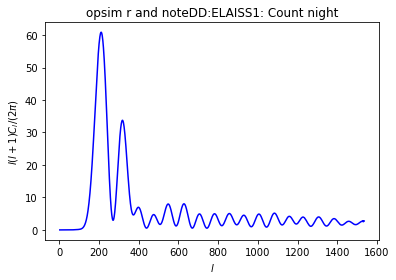

In [3]:
nside=512
bundleList = []
sql = 'filter="r" and note="DD:ELAISS1"'
metric = metrics.CountMetric(col='night')
slicer = slicers.HealpixSlicer(nside=nside)
plotDict = {}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict))
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the 

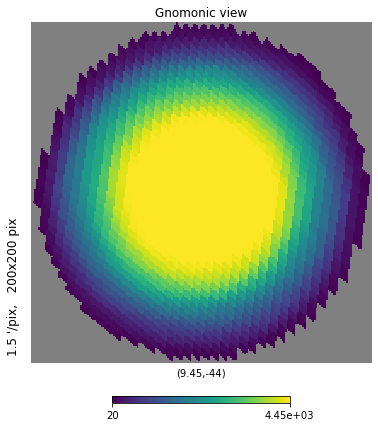

In [4]:
hp.gnomview(bundleList[0].metricValues, rot=(9.45, -44))

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Querying database SummaryAllProps with constraint filter="r" and note="DD:ELAISS1" for columns ['fieldDec', 'night', 'fieldRA', 'rotSkyPos']
Found 4448 visits
Running:  ['opsim_Count_night_r_and_noteDD_ELAISS1_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r" and note="DD:ELAISS1"" constraint now.


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: -5.67982e+06  dipole: lon: 9.46767, lat: -43.9856, amp: 5.68441e+06
  warnings.warn(


Plotting complete.


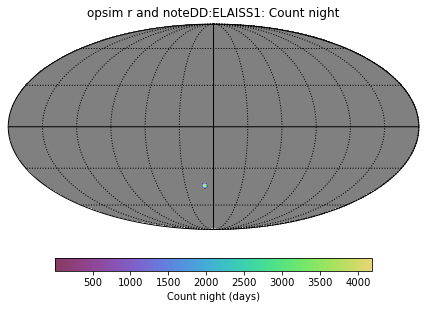

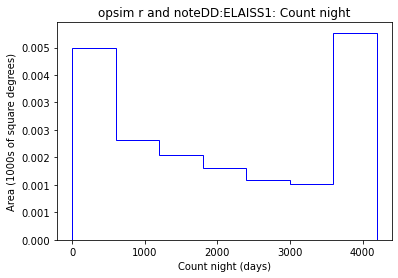

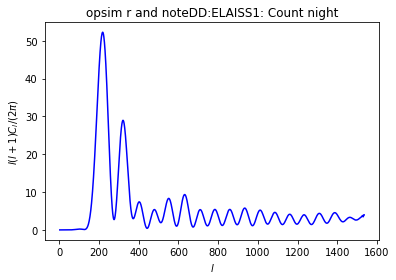

In [5]:
nside=512
bundleList = []
sql = 'filter="r" and note="DD:ELAISS1"'
metric = metrics.CountMetric(col='night')
slicer = slicers.HealpixSlicer(useCamera=True, useCache=False, nside=nside)
plotDict = {}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict))
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the 

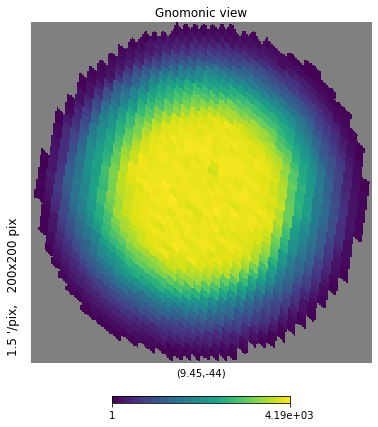

In [6]:
hp.gnomview(bundleList[0].metricValues, rot=(9.45, -44))

In [7]:
names = ['fieldRA', 'fieldDec', 'rotSkyPos', 'observationStartMJD']
types = [float]*4
npts = 180
data = np.zeros(npts, dtype=list(zip(names,types)))
data['rotSkyPos'] = np.arange(0,npts*2,2)
deltaMJD = 34.*npts/3600./24.
expMJD_0 = 57000.
data['observationStartMJD'] = expMJD_0+np.arange(0,deltaMJD, 34./3600./24.)

outDir = 'temp'
resultsDb = db.ResultsDb(outDir=outDir)
nside = 2048
metric = metrics.CountMetric(col='fieldRA')
slicer = slicers.HealpixSlicer(nside=nside, useCamera=True, useCache=False)
bundle = metricBundles.MetricBundle(metric,slicer,'')
bg = metricBundles.MetricBundleGroup({1:bundle},None,  outDir=outDir, resultsDb=resultsDb)
bg.setCurrent('')
bg.runCurrent('',simData=data)

Healpix slicer using NSIDE=2048, approximate resolution 1.717743 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/metricBundles/metricBundleGroup.py:110: UserWarning: Warning: dbObj should be an instantiated Database (or child) object.
  warnings.warn('Warning: dbObj should be an instantiated Database (or child) object.')


Running:  [1]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


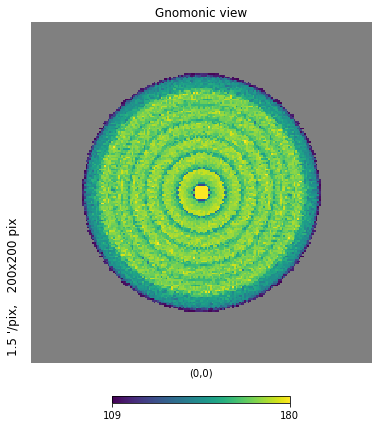

In [8]:
bundle.metricValues.data[np.where(bundle.metricValues.mask == True)] = hp.UNSEEN
hp.gnomview(bundle.metricValues.data)

In [9]:
print('fill factor = %f' % (bundle.metricValues.mean()/bundle.metricValues.max()))

fill factor = 0.881180


In [10]:
good = np.where(bundle.metricValues.mask != True)
# compute the ra and dec of each pixel, find distance to 0,0
lat, ra = hp.pix2ang(nside, np.arange(hp.nside2npix(nside))[good])
dec = np.pi/2. - lat
radius = haversine(ra,dec,0.,0.)

Text(0, 0.5, 'Number of Observations (max 180)')

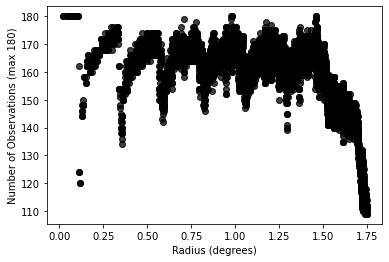

In [11]:
plt.plot(np.degrees(radius), bundle.metricValues.data[good], 'ko', alpha=.5)
plt.xlabel('Radius (degrees)')
plt.ylabel('Number of Observations (max %i)' % npts)

In [12]:
# Let's look at just one pointing
bg.runCurrent('',simData=data[0:1])


Running:  [1]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the 

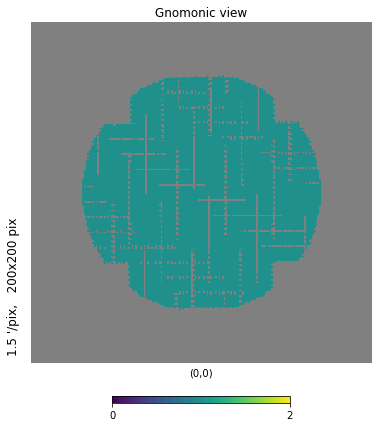

In [13]:
bundle.metricValues.data[np.where(bundle.metricValues.mask == True)] = hp.UNSEEN
hp.gnomview(bundle.metricValues.data)

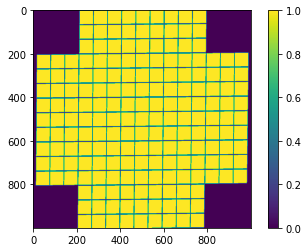

In [7]:
plt.imshow(slicer.camera_fov)
plt.colorbar()
